In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
import pandas as pd

# Reading Data

In [2]:
data=pd.read_csv("seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# EDA 

In [3]:
data.shape

(1461, 6)

<Axes: xlabel='weather', ylabel='count'>

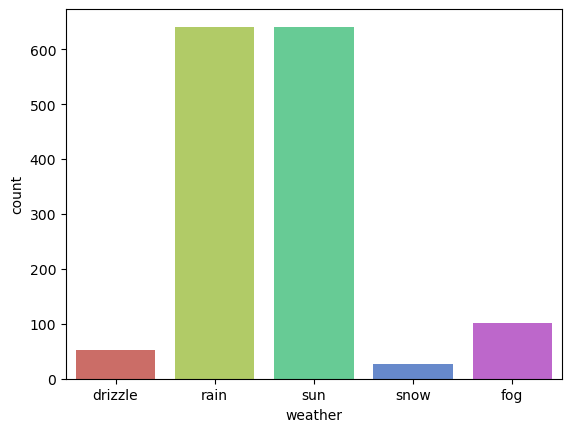

In [4]:
import warnings
warnings.filterwarnings('ignore')
# sns.countplot("weather",data=data,palette='hls')
sns.countplot(x="weather", data=data, palette="hls")


In [5]:
countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:0.2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:0.2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:0.2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:0.2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:0.2f}%'.format((countfog/(len(data.weather))*100)))

percent of rain:43.87%
percent of sun:43.81%
percent of drizzle:3.63%
percent of snow:1.78%
percent of fog:6.91%


In [6]:
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

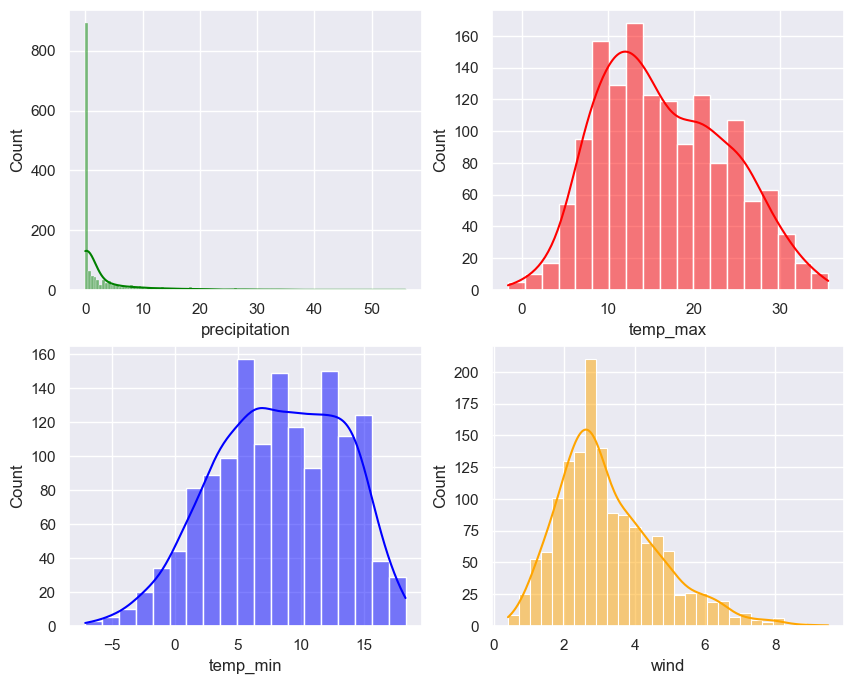

In [7]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='wind'>

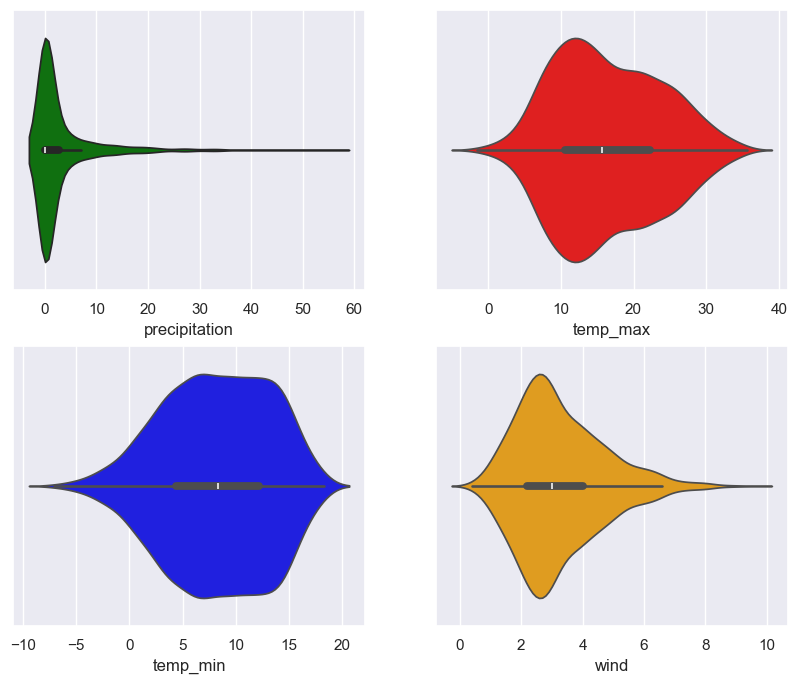

In [8]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.violinplot(data=data, x='precipitation', ax=axs[0, 0], color='green')
sns.violinplot(data=data, x='temp_max', ax=axs[0, 1], color='red')
sns.violinplot(data=data, x='temp_min', ax=axs[1, 0], color='blue')
# sns.violinplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')
sns.violinplot(data=data, x='wind', bw='scott', ax=axs[1, 1], color='orange')

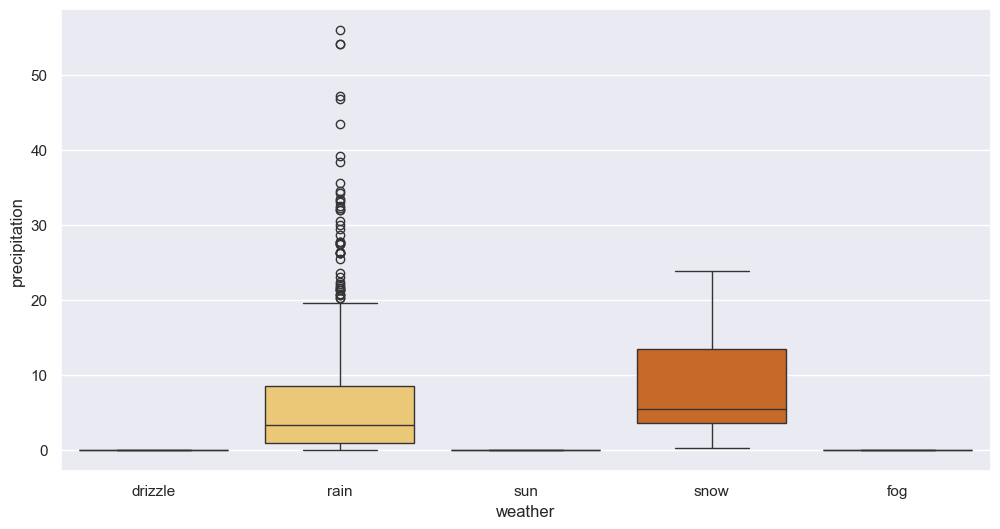

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='precipitation', data=data, palette='YlOrBr')
plt.show()

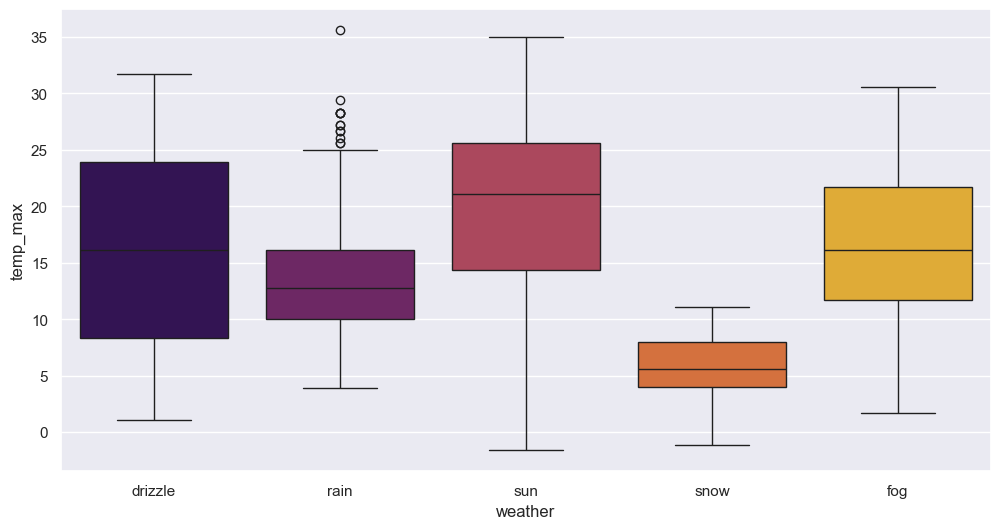

In [10]:
# plt.figure(figsize=(12,6))
# sns.boxplot('temp_max','weather',data=data,palette='inferno')

plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='temp_max', data=data, palette='inferno')
plt.show()

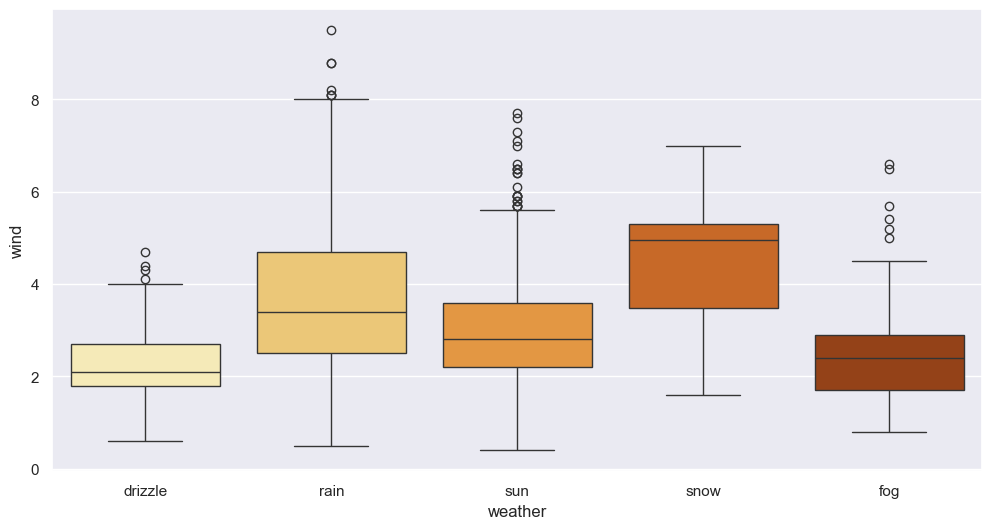

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='wind', data=data, palette='YlOrBr')
plt.show()

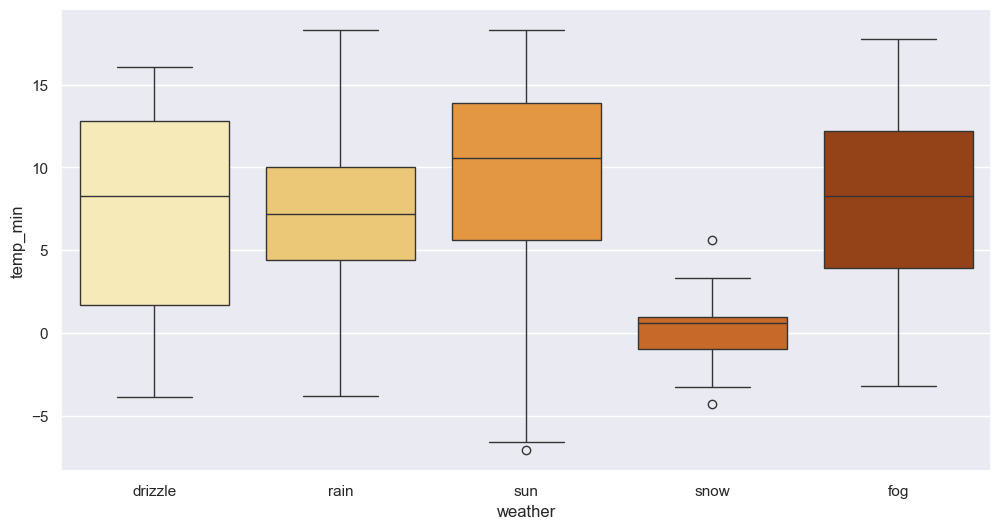

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='temp_min', data=data, palette='YlOrBr')
plt.show()


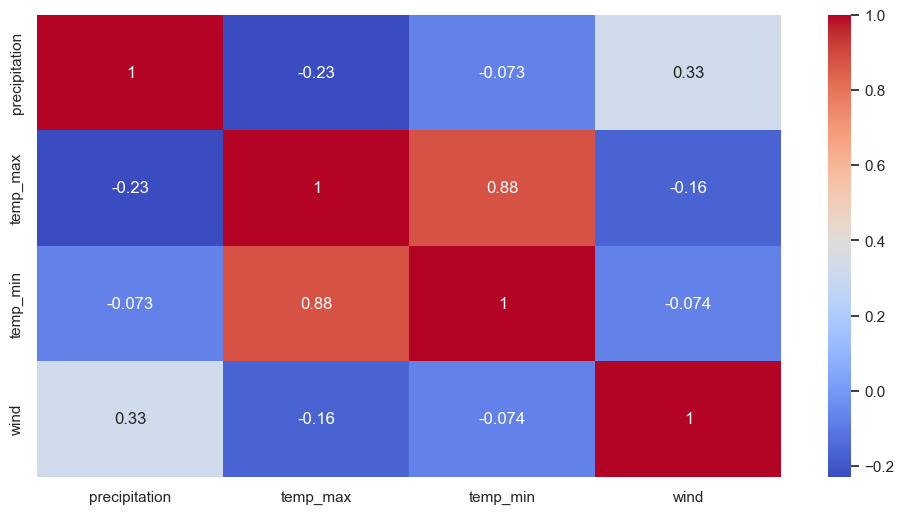

In [13]:
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Pearson correlation:  -0.22855481643297043
T test statistic: -51.60685279531918
P value: 0.0


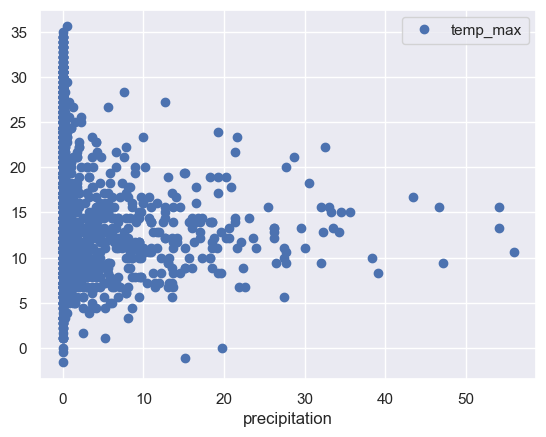

In [14]:
from scipy import stats

# Plotting scatter plot
data.plot("precipitation", 'temp_max', style='o')

# Calculating Pearson correlation coefficient
print('Pearson correlation: ', data['precipitation'].corr(data['temp_max']))

# Performing t-test and calculating p-value
t_statistic, p_value = stats.ttest_ind(data['precipitation'], data['temp_max'])
print('T test statistic:', t_statistic)
print('P value:', p_value)

pearsons correlation:  -0.1648566348749548
T test and P value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


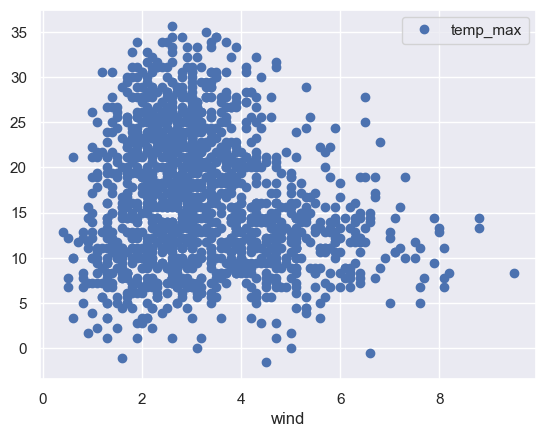

In [15]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

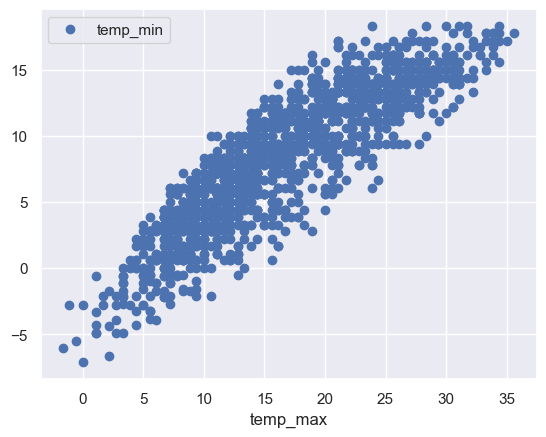

In [16]:
data.plot('temp_max','temp_min',style='o')

In [17]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# Data Cleaning

<Axes: >

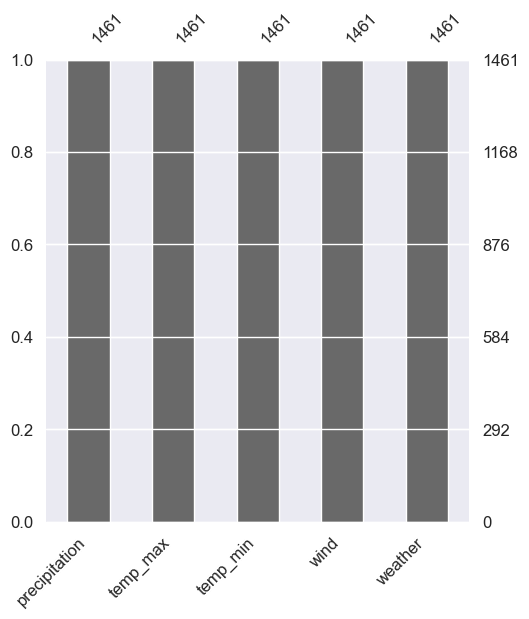

In [18]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(['date'],axis=1),ax=axz,fontsize=12)

In [19]:
# Check column names
print(data.columns)

# Drop 'date' column if it exists
if 'date' in data.columns:
    data = data.drop(['date'], axis=1)
    print("Column 'date' dropped successfully.")
else:
    print("Column 'date' not found.")


Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
Column 'date' dropped successfully.


In [20]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


# Feature Encoding

In [21]:
lc=LabelEncoder()
data['weather']=lc.fit_transform(data['weather'])

In [22]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


# Data Preprocessing and Splitting:

In [23]:
x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
y=data['weather'].values

data.weather.unique()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

# Model Training and Evaluation

In [24]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('KNN accuracy: {:.2f}%'.format(knn.score(x_test, y_test) * 100))

# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
print('SVM accuracy:{:.2f}%'.format(svm.score(x_test,y_test)*100))

# Gradient Boosting Classifier (GBC)
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_test,y_test)*100))

# XGBoost Classifier (XGB)
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print('XGB accuracy:{:.2f}%'.format(xgb.score(x_test,y_test)*100))

KNN accuracy: 76.87%
SVM accuracy:77.55%
GBC accuracy:76.87%
XGB accuracy:78.23%


# Prediction:

In [25]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')

the weather is:
rain


In [36]:
input=[[2.8, 2.469818, 1.140175, 8.9]]
ot=gbc.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')

the weather is:
snow


In [43]:
input=[[8.0, 1.1, 2.0, 8.8]]
ot=svm.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')

the weather is:
rain


In [44]:
input=[[2.8, 2.469818, 1.140175, 8.9]]
ot=knn.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')

the weather is:
snow


# Model Saving:

In [45]:
import pickle
file = 'model.pkl'
pickle.dump(xgb, open(file, 'wb'))